In [1]:
import sympy
from sympy import symbols
from galgebra.ga import Ga
from galgebra.printer import latex
from IPython.display import Math
import numpy
import math
import random

# tell sympy to use our printing by default
sympy.init_printing(latex_printer=latex, use_latex='mathjax')

s3coords = (x,y,z) = symbols('1 2 3', real=True)
s3 = Ga('e',
         g=[1,1,1],
         coords=s3coords)

M = s3.mv('M','mv',f = True)


e1, e2, e3 = s3.mv()

In [2]:
import copy
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt

def closure_of_generators(gens):
    elts = copy.copy(gens)
    new = copy.copy(gens)

    while True:
        new1 = [ ]
        for u in new:
            for v in gens:
                tmp = u * v
                if not tmp in elts:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(elts),len(new1))
            print('----------------')
            elts = elts+new1
            new = copy.copy(new1)
    print('There are ', len(elts), ' elements in total.')
    return elts

def closure_of_roots(simples):
    simple_roots = [a for a in simples]
    roots = [a for a in simples]
    new = [a for a in simples]
    while 1==1:
        new1 = [ ]
        for u in new:
            for n in simple_roots:
                tmp = -n * u * n
                if not tmp in roots:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(roots),len(new1))
            print('----------------')
            roots = roots+new1
            new = [a for a in new1]
    print('This is a root system with ', len(roots), ' roots')
    return roots

def order_of_element(m):
    tmp = m
    count = 1
    id = e1*e1
    while tmp != id:
        tmp = tmp*m
        count += 1
    return count

def find_inverses(group):
    g_inv = []
    m = group[0]
    id = e1*e1
    for i in group:
        for j in group:
            if i*j == id:
                g_inv.append(j)
                break
    return g_inv


def conjugacy_classes(elts):
    
    elts_inv = find_inverses(elts)
    classes = []
    leftover = set(range(0,len(elts)))

    for i in range(len(elts)):
        if i in leftover:
            newclass  = set([i])
            for j in range(len(elts)):
                if j != i:
                    tmp = elts[j]*elts[i]*elts_inv[j]
                    for k in range(len(elts)):
                        if k in leftover:
                            if tmp == elts[k]:
                                newclass.add(k)
                                leftover = leftover.difference([k])
                                break
            classes.append(newclass)
            print(len(leftover))
    return classes


def spIP(R1, R2):
    
    ip = 1/2*(R1*R2.rev()+R2*R1.rev())
    
    return ip

def CM(simple_roots_4D):

    A = zeros(len(simple_roots_4D), len(simple_roots_4D))
    for i in range(len(simple_roots_4D)):
        for j in range(len(simple_roots_4D)):
            tmp = spIP(simple_roots_4D[i], simple_roots_4D[j])
            A[i,j]=2*tmp.blade_coefs()[0] 
    return A

In [3]:
def find_ito_generators_recursive_pin(gens, given_element):
    done = False
    for g in range(len(gens)):
        if gens[g] == given_element:
            print('Done: generator', gens[g] , 'Generator ', g)
            done = True
            return gens[g]
        
    
    elts = copy.copy(gens)
    new = copy.copy(gens)
    count = 0
    while done == False:
        new1 = [ ]
        for u in new:
            for v in range(len(gens)):
                tmp = u * gens[v]
                if not tmp in elts:
                    if not tmp in new1:
                        new1.append(tmp)
                        count+=1
                        #print(tmp, v)
                        if given_element == tmp:
                            print('-------')
                            print('found it',  gens[v], 'Generator ',v)
                            print('-------')
                            find_ito_generators_recursive(gens, u)
                            done = True
                            break
            
        if new1 == [ ]:
            break
        else:
            print(len(elts),len(new1))
            print('----------------')
            elts = elts+new1
            new = copy.copy(new1)
    print('There are ', len(elts), ' elements in total.')
    return 

In [4]:
def closure_of_generators_words(gens):
    elts = copy.copy(gens)
    new = copy.copy(gens)
    path = []
    for i in range(len(gens)):
        path.append(str(i+1))

    while True:
        new1 = [ ]
        for j in range(len(new)):
            for k in range(len(gens)):
                tmp = new[j] * gens[k]
                if not tmp in elts:
                    if not tmp in new1:
                        new1.append(tmp)
                        path.append((path[len(elts)-len(new)+j])+str(k+1))
                        print(tmp, 'generator path is ',(path[len(elts)-len(new)+j])+str(k+1))
                        #print(len(elts)+len(new1), len(path), j)
        if new1 == [ ]:
            break
        else:
            print(len(elts),len(new1))
            print('----------------')
            elts = elts+new1
            new = copy.copy(new1)
    print('There are ', len(elts), ' elements in total.')
    return elts, path

In [5]:
def fourDvecto3Dspinor(vector):
    a0 = vector[0]
    a3 = vector[1]
    a2 =-vector[2]
    a1 = vector[3]
    B =a0+a1*(e2^e3) - a2*(e1^e3) + a3*(e1^e2)
    return B

def reflect_spinor(R1, R2):
    B = -R1*R2.rev()*R1
    return B

def closure_of_roots_in_spin(simples):
    simple_roots = [a for a in simples]
    roots = [a for a in simples]
    new = [a for a in simples]
    while 1==1:
        new1 = [ ]
        for u in new:
            for n in simple_roots:
                tmp = reflect_spinor(n, u) 
                if not tmp in roots:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(roots),len(new1))
            print('----------------')
            roots = roots+new1
            new = [a for a in new1]
    print('This is a root system with ', len(roots), ' roots')
    return roots

def closure_of_roots_in_spin_limit(simples, limit):
    simple_roots = [a for a in simples]
    roots = [a for a in simples]
    new = [a for a in simples]
    while 1==1:
        new1 = [ ]
        for u in new:
            for n in simple_roots:
                tmp = reflect_spinor(n, u) 
                if not tmp in roots:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(roots),len(new1))
            print('----------------')
            roots = roots+new1
            new = [a for a in new1]
            if len(roots)>limit:
                break
    print('This is a root system with ', len(roots), ' roots')
    return roots

In [6]:
def conjugacy_classes_quicker(elts):
    
    elts_inv = find_inverses_quicker(elts)
    print('inverses found')
    classes = []
    leftover = set(range(0,len(elts)))

    while len(leftover)>0:
        i = random.choice(tuple(leftover))
        newclass  = set([i])
        for j in range(len(elts)):
            if j != i:
                tmp = elts[j]*elts[i]*elts_inv[j]
                for k in range(len(elts)):
                    if k in leftover:
                        if tmp == elts[k]:
                            newclass.add(k)
                            leftover = leftover.difference([k])
                            break
        classes.append(newclass)
        print(len(leftover))
    return classes

def find_inverses_quicker(group):
    g_inv = []
    id = e1*e1
    for i in group:
        j = i.rev()
        if i*j == id:
            g_inv.append(j)
        elif i*j == -id:
            g_inv.append(-j)
        else:
            print('theres a problem')
    return g_inv

# Setting up the $H_3$ simple roots and computing the pin and spin group in terms of words in the generators/simple roots

In [7]:
tau=1/2*(1+sympy.sqrt(5))

a1, a2, a3 = e2, 1/2*(-tau*e1-e2-(tau-1)*e3), e1

Pin_H3_elts, Pin_H3_paths = closure_of_generators_words([a1, a2, a3])

1 generator path is  11
-0.5 + (0.25 + 0.25*sqrt(5))*e_1^e_2 + (-0.25*sqrt(5) + 0.25)*e_2^e_3 generator path is  12
-e_1^e_2 generator path is  13
-0.5 + (-0.25*sqrt(5) - 0.25)*e_1^e_2 + (-0.25 + 0.25*sqrt(5))*e_2^e_3 generator path is  21
-0.25*sqrt(5) - 0.25 + 0.5*e_1^e_2 + (-0.25 + 0.25*sqrt(5))*e_1^e_3 generator path is  23
e_1^e_2 generator path is  31
-0.25*sqrt(5) - 0.25 - 0.5*e_1^e_2 + (-0.25*sqrt(5) + 0.25)*e_1^e_3 generator path is  32
3 7
----------------
(0.25 + 0.25*sqrt(5))*e_1 - 0.5*e_2 + (-0.25 + 0.25*sqrt(5))*e_3 generator path is  121
-0.5*e_1 + (-0.25*sqrt(5) - 0.25)*e_2 + (-0.25*sqrt(5) + 0.25)*e_1^e_2^e_3 generator path is  123
-e_1 generator path is  131
0.5*e_1 + (-0.25*sqrt(5) - 0.25)*e_2 + (-0.25 + 0.25*sqrt(5))*e_1^e_2^e_3 generator path is  132
-0.5*e_1 + (0.25 + 0.25*sqrt(5))*e_2 + (-0.25 + 0.25*sqrt(5))*e_1^e_2^e_3 generator path is  213
0.5*e_1 + (-0.25*sqrt(5) - 0.25)*e_2 + (-0.25*sqrt(5) + 0.25)*e_1^e_2^e_3 generator path is  231
(-0.25 + 0.25*sqrt(5))*e

(0.25 + 0.25*sqrt(5))*e_2 + (-0.25*sqrt(5) + 0.25)*e_3 + 0.5*e_1^e_2^e_3 generator path is  1213213
(-0.25*sqrt(5) - 0.25)*e_2 + (-0.25 + 0.25*sqrt(5))*e_3 - 0.5*e_1^e_2^e_3 generator path is  1213231
0.5*e_1 + 0.5*e_2 + 0.5*e_3 + 0.5*e_1^e_2^e_3 generator path is  1213232
-0.5*e_1 - 0.5*e_2 - 0.5*e_3 - 0.5*e_1^e_2^e_3 generator path is  1231232
0.5*e_1 - 0.5*e_2 + 0.5*e_3 + 0.5*e_1^e_2^e_3 generator path is  1232132
-0.5*e_1 + 0.5*e_2 - 0.5*e_3 - 0.5*e_1^e_2^e_3 generator path is  1232312
(-0.25*sqrt(5) + 0.25)*e_1 + (-0.25*sqrt(5) - 0.25)*e_2 + 0.5*e_3 generator path is  1232321
(-0.25*sqrt(5) - 0.25)*e_1 + (-0.25*sqrt(5) + 0.25)*e_2 + 0.5*e_1^e_2^e_3 generator path is  1312321
(-0.25*sqrt(5) + 0.25)*e_1 + (0.25 + 0.25*sqrt(5))*e_2 + 0.5*e_3 generator path is  1312323
(0.25 + 0.25*sqrt(5))*e_2 + (-0.25*sqrt(5) + 0.25)*e_3 - 0.5*e_1^e_2^e_3 generator path is  1321321
(0.25 + 0.25*sqrt(5))*e_1 - 0.5*e_3 + (-0.25 + 0.25*sqrt(5))*e_1^e_2^e_3 generator path is  1321323
(-0.25*sqrt(5) - 0.

-0.5 + (-0.25 + 0.25*sqrt(5))*e_1^e_3 + (0.25 + 0.25*sqrt(5))*e_2^e_3 generator path is  2132312321
0.5 + (-0.25 + 0.25*sqrt(5))*e_1^e_3 + (-0.25*sqrt(5) - 0.25)*e_2^e_3 generator path is  2321321321
-0.5*e_1^e_2 + (-0.25*sqrt(5) - 0.25)*e_1^e_3 + (-0.25*sqrt(5) + 0.25)*e_2^e_3 generator path is  2321321323
-0.5 + (-0.25*sqrt(5) + 0.25)*e_1^e_3 + (0.25 + 0.25*sqrt(5))*e_2^e_3 generator path is  2321323121
0.5*e_1^e_2 + (0.25 + 0.25*sqrt(5))*e_1^e_3 + (-0.25 + 0.25*sqrt(5))*e_2^e_3 generator path is  2321323123
-0.25*sqrt(5) + 0.25 + 0.5*e_1^e_2 + (0.25 + 0.25*sqrt(5))*e_2^e_3 generator path is  3213213213
-0.25 + 0.25*sqrt(5) - 0.5*e_1^e_2 + (-0.25*sqrt(5) - 0.25)*e_2^e_3 generator path is  3213213231
168 22
----------------
(-0.25*sqrt(5) + 0.25)*e_1 + (-0.25*sqrt(5) - 0.25)*e_3 - 0.5*e_1^e_2^e_3 generator path is  12132132132
(-0.25 + 0.25*sqrt(5))*e_1 + (0.25 + 0.25*sqrt(5))*e_3 + 0.5*e_1^e_2^e_3 generator path is  12132132312
0.5*e_2 + (-0.25*sqrt(5) - 0.25)*e_3 + (-0.25 + 0.25*sqr

# Calculate conjugacy classes

In [84]:
pin_CC_H3 = conjugacy_classes_quicker(Pin_H3_elts)

inverses found
220
208
178
166
154
134
104
92
80
60
48
36
24
23
22
2
1
0


In [185]:
for cclass in pin_CC_H3:
    print(  '\n  \hline \n')
    for element in sorted(list(cclass)):
        #print('$', order_of_element(Pin_H3_elts[element]),'$', '& ', '$',element+1,'$', '& $',  latex(2*Pin_H3_elts[element]), ' $ &', Pin_H3_paths[element], '\\\\')
        print(order_of_element(Pin_H3_elts[element]),element+1,(2*Pin_H3_elts[element]),  Pin_H3_paths[element])



  \hline 

12 52 (-0.5*sqrt(5) - 0.5)*e_1 + (-0.5 + 0.5*sqrt(5))*e_2 - 1.0*e_1^e_2^e_3 13232
12 55 (-0.5*sqrt(5) - 0.5)*e_2 + (-0.5*sqrt(5) + 0.5)*e_3 - 1.0*e_1^e_2^e_3 21323
12 58 (0.5 + 0.5*sqrt(5))*e_1 + (-0.5*sqrt(5) + 0.5)*e_2 - 1.0*e_1^e_2^e_3 23213
12 62 (0.5 + 0.5*sqrt(5))*e_2 + (-0.5 + 0.5*sqrt(5))*e_3 - 1.0*e_1^e_2^e_3 32132
12 64 (0.5 + 0.5*sqrt(5))*e_1 + (-0.5 + 0.5*sqrt(5))*e_2 - 1.0*e_1^e_2^e_3 32321
12 94 (-0.5*sqrt(5) - 0.5)*e_1 + (-0.5*sqrt(5) + 0.5)*e_2 - 1.0*e_1^e_2^e_3 1213123
12 96 (-0.5*sqrt(5) - 0.5)*e_2 + (-0.5 + 0.5*sqrt(5))*e_3 - 1.0*e_1^e_2^e_3 1213231
12 98 -1.0*e_1 - 1.0*e_2 - 1.0*e_3 - 1.0*e_1^e_2^e_3 1231232
12 100 -1.0*e_1 + 1.0*e_2 - 1.0*e_3 - 1.0*e_1^e_2^e_3 1232312
12 104 (0.5 + 0.5*sqrt(5))*e_2 + (-0.5*sqrt(5) + 0.5)*e_3 - 1.0*e_1^e_2^e_3 1321321
12 112 1.0*e_1 - 1.0*e_2 + 1.0*e_3 - 1.0*e_1^e_2^e_3 2312321
12 115 1.0*e_1 + 1.0*e_2 + 1.0*e_3 - 1.0*e_1^e_2^e_3 2323121
12 116 1.0*e_1 - 1.0*e_2 - 1.0*e_3 - 1.0*e_1^e_2^e_3 2323123
12 120 -1.0*e_1 + 1.0*e

4 130 (0.5 + 0.5*sqrt(5))*e_1^e_2 + (-0.5*sqrt(5) + 0.5)*e_1^e_3 + 1.0*e_2^e_3 13213231
4 139 1.0*e_1^e_2 + (0.5 + 0.5*sqrt(5))*e_1^e_3 + (-0.5*sqrt(5) + 0.5)*e_2^e_3 23213232
4 140 -1.0*e_1^e_2 + (-0.5*sqrt(5) - 0.5)*e_1^e_3 + (-0.5 + 0.5*sqrt(5))*e_2^e_3 23231232
4 175 -1.0*e_1^e_2 + (0.5 + 0.5*sqrt(5))*e_1^e_3 + (-0.5 + 0.5*sqrt(5))*e_2^e_3 1232132321
4 176 1.0*e_1^e_2 + (-0.5*sqrt(5) - 0.5)*e_1^e_3 + (-0.5*sqrt(5) + 0.5)*e_2^e_3 1232312321
4 181 (-0.5 + 0.5*sqrt(5))*e_1^e_2 + 1.0*e_1^e_3 + (-0.5*sqrt(5) - 0.5)*e_2^e_3 2132132132
4 182 (-0.5*sqrt(5) + 0.5)*e_1^e_2 - 1.0*e_1^e_3 + (0.5 + 0.5*sqrt(5))*e_2^e_3 2132132312
4 186 -1.0*e_1^e_2 + (-0.5*sqrt(5) - 0.5)*e_1^e_3 + (-0.5*sqrt(5) + 0.5)*e_2^e_3 2321321323
4 188 1.0*e_1^e_2 + (0.5 + 0.5*sqrt(5))*e_1^e_3 + (-0.5 + 0.5*sqrt(5))*e_2^e_3 2321323123
4 209 (-0.5*sqrt(5) + 0.5)*e_1^e_2 + 1.0*e_1^e_3 + (0.5 + 0.5*sqrt(5))*e_2^e_3 121321321321
4 211 (-0.5 + 0.5*sqrt(5))*e_1^e_2 - 1.0*e_1^e_3 + (-0.5*sqrt(5) - 0.5)*e_2^e_3 121321323121
4 21

10 218 -0.5*sqrt(5) + 0.5 + (0.5 + 0.5*sqrt(5))*e_1^e_3 + 1.0*e_2^e_3 213213213231
10 219 -0.5*sqrt(5) + 0.5 + (-0.5*sqrt(5) - 0.5)*e_1^e_3 + 1.0*e_2^e_3 232132132132

  \hline 

4 240 2.0*e_1^e_2^e_3 121321321323123

  \hline 

1 4 2 11

  \hline 

6 28 1.0 + (0.5 + 0.5*sqrt(5))*e_1^e_2 + (-0.5 + 0.5*sqrt(5))*e_2^e_3 1323
6 32 1.0 + (0.5 + 0.5*sqrt(5))*e_1^e_2 + (-0.5*sqrt(5) + 0.5)*e_2^e_3 2313
6 37 1.0 + (-0.5*sqrt(5) - 0.5)*e_1^e_2 + (-0.5 + 0.5*sqrt(5))*e_2^e_3 3132
6 39 1.0 + (-0.5*sqrt(5) - 0.5)*e_1^e_2 + (-0.5*sqrt(5) + 0.5)*e_2^e_3 3231
6 81 1.0 - 1.0*e_1^e_2 - 1.0*e_1^e_3 + 1.0*e_2^e_3 213232
6 84 1.0 + 1.0*e_1^e_2 + 1.0*e_1^e_3 - 1.0*e_2^e_3 232312
6 123 1.0 + 1.0*e_1^e_2 - 1.0*e_1^e_3 - 1.0*e_2^e_3 12132321
6 126 1.0 + 1.0*e_1^e_2 - 1.0*e_1^e_3 + 1.0*e_2^e_3 12321323
6 127 1.0 - 1.0*e_1^e_2 + 1.0*e_1^e_3 + 1.0*e_2^e_3 12323121
6 132 1.0 + 1.0*e_1^e_2 + 1.0*e_1^e_3 + 1.0*e_2^e_3 13231232
6 136 1.0 + (-0.5*sqrt(5) + 0.5)*e_1^e_2 + (-0.5*sqrt(5) - 0.5)*e_1^e_3 21323123
6 138 1

# Grand antiprism and snub 24-cell

Use subrootsystems to split the 600-cell into two separately invariant polytopes. Explicitly verify they are stabilised. 

In [8]:
spin_group_H3 = closure_of_generators([a1*a2, a2*a3])

2 4
----------------
6 8
----------------
14 12
----------------
26 15
----------------
41 18
----------------
59 19
----------------
78 19
----------------
97 15
----------------
112 8
----------------
There are  120  elements in total.


In [9]:
def closed_under_spin_reflections(points, group):
    for u in points:
        for n in group:
            tmp = reflect_spinor(n, u) 
            if not tmp in points:
                print('issue')
                return False
                break
    return True

$A_2\oplus A_2$ example 

In [10]:
A2A2 = closure_of_roots_in_spin([a1*a1, a1*a2, e1*e2*e3*a1, e1*e2*e3*a2])

4 6
----------------
10 2
----------------
This is a root system with  12  roots


In [11]:
for dec in A2A2:
    print(dec in spin_group_H3)

True
True
True
True
True
True
True
True
True
True
True
True


In [12]:
compA2A2 = []

for elmt in spin_group_H3:
    if not elmt  in A2A2:
        compA2A2.append(elmt)
len(compA2A2)

108

In [203]:
A2A2stable = closed_under_spin_reflections(A2A2, A2A2)
A2A2stable

True

In [204]:
compA2A2stable = closed_under_spin_reflections(compA2A2, A2A2)
compA2A2stable

True

$H_2\oplus H_2$ example (Grand Antiprism)

In [13]:
H2H2 = closure_of_roots_in_spin([a1*a1, a3*a2, e1*e2*e3*a3, e1*e2*e3*a2])

4 8
----------------
12 6
----------------
18 2
----------------
This is a root system with  20  roots


In [14]:
for dec in H2H2:
    print(dec in spin_group_H3)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [207]:
GA = []

for elmt in spin_group_H3:
    if not elmt  in H2H2:
        GA.append(elmt)
len(GA)

100

In [208]:
closed_under_spin_reflections(GA, H2H2)

True

In [209]:
H2H2stable = closed_under_spin_reflections(H2H2, H2H2)
H2H2stable

True

Aside for different choices of simple roots for the subrootsystems we need:

$H_2\oplus H_2$ (see separate worksheet for doubling)

In [15]:
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt

simple_roots_4D = [a1*a1, a2*a3, a3*e1*e2*e3,  a2*e1*e2*e3]

A = zeros(4, 4)
for i in range(len(simple_roots_4D)):
    for j in range(len(simple_roots_4D)):
        tmp = spIP(simple_roots_4D[i], simple_roots_4D[j])
        A[i,j]=2*tmp.blade_coefs()[0] 
A

Matrix([
[               2.0, -0.5*sqrt(5) - 0.5,                  0,                  0],
[-0.5*sqrt(5) - 0.5,                2.0,                  0,                  0],
[                 0,                  0,                2.0, -0.5*sqrt(5) - 0.5],
[                 0,                  0, -0.5*sqrt(5) - 0.5,                2.0]])

$A_2\oplus A_2$

In [16]:
simple_roots_4D = [a1*a1, a1*a2, a2*e1*e2*e3,  a1*e1*e2*e3]

A = zeros(4, 4)
for i in range(len(simple_roots_4D)):
    for j in range(len(simple_roots_4D)):
        #print(simple_roots_4D[i],simple_roots_4D[j])
        tmp = spIP(simple_roots_4D[i], simple_roots_4D[j])
        #print(tmp.blade_coefs()[0])
        A[i,j]=2*tmp.blade_coefs()[0] #spIP(simple_roots_4D[i], simple_roots_4D[j])
A

Matrix([
[ 2.0, -1.0,    0,    0],
[-1.0,  2.0,    0,    0],
[   0,    0,  2.0, -1.0],
[   0,    0, -1.0,  2.0]])

$H_4$

In [17]:
simple_roots_4D = [a1*a1, a1*a2,  e1*e2*a2*e3, a2*e1*e2*e3]

A = CM(simple_roots_4D)
A


Matrix([
[ 2.0, -1.0,                  0,                  0],
[-1.0,  2.0,               -1.0,                  0],
[   0, -1.0,                2.0, -0.5*sqrt(5) - 0.5],
[   0,    0, -0.5*sqrt(5) - 0.5,                2.0]])

In [37]:
H4_RS=closure_of_roots_in_spin(simple_roots_4D)

4 8
----------------
12 8
----------------
20 8
----------------
28 8
----------------
36 8
----------------
44 8
----------------
52 7
----------------
59 6
----------------
65 6
----------------
71 6
----------------
77 6
----------------
83 6
----------------
89 5
----------------
94 4
----------------
98 4
----------------
102 4
----------------
106 3
----------------
109 2
----------------
111 2
----------------
113 2
----------------
115 2
----------------
117 2
----------------
119 1
----------------
This is a root system with  120  roots


$A_4$

In [214]:
CM([a1*a1, a1*a2, a1*a3*a2*a1*a3*a2*a1*a3, a3*a2*a1*a3*a2*a1*a3*a2*a3*a1*a2*a3])

Matrix([
[ 2.0, -1.0,    0,    0],
[-1.0,  2.0, -1.0,    0],
[   0, -1.0,  2.0, -1.0],
[   0,    0, -1.0,  2.0]])

In [132]:
A4 = closure_of_roots_in_spin([a1*a1, a1*a2, a1*a3*a2*a1*a3*a2*a1*a3, a3*a2*a1*a3*a2*a1*a3*a2*a3*a1*a2*a3])

4 7
----------------
11 5
----------------
16 3
----------------
19 1
----------------
This is a root system with  20  roots


Carry on with the stability of the complementary polytope pairs here for the other cases whose simple roots we now have. 

In [135]:
A4snub = []

for elmt in spin_group_H3:
    if not elmt  in A4:
        A4snub.append(elmt)
len(A4snub)

100

In [144]:
A4snub_stable = closed_under_spin_reflections(A4snub, A4)
A4snub_stable

True

$D_4$ and the snub 24-cell

In [216]:
CM([a1*a1, a1*a2, a1*a2*a3*a2*a3*a1*a2*a3, a3*a2*a1*a3*a2*a1*a3*a2])

Matrix([
[ 2.0, -1.0, -1.0, -1.0],
[-1.0,  2.0,    0,    0],
[-1.0,    0,  2.0,    0],
[-1.0,    0,    0,  2.0]])

In [95]:
D4 = closure_of_roots_in_spin([a1*a1, a1*a2, a1*a2*a3*a2*a3*a1*a2*a3, a3*a2*a1*a3*a2*a1*a3*a2])

4 7
----------------
11 6
----------------
17 4
----------------
21 2
----------------
23 1
----------------
This is a root system with  24  roots


In [96]:
snub = []

for elmt in spin_group_H3:
    if not elmt  in D4:
        snub.append(elmt)
len(snub)

96

In [97]:
D4stable = closed_under_spin_reflections(D4, D4)
D4stable

True

In [98]:
snub_stable = closed_under_spin_reflections(snub, D4)
snub_stable

True

Just some routines to export the point lists

In [121]:
def ThreeDspinortofourDvector(spinor):
    b0 = (spinor.blade_coefs()[0])
    b3 = (spinor.blade_coefs()[4])
    b2 =-(spinor.blade_coefs()[5])
    b1 = (spinor.blade_coefs()[6])
    B =[b0, b3, -b2, b1]
    return B

def ThreeDspinortofourDvector_num(spinor):
    b0 = (spinor.blade_coefs()[0])
    b3 = (spinor.blade_coefs()[4])
    b2 =-(spinor.blade_coefs()[5])
    b1 = (spinor.blade_coefs()[6])
    B =[round(float(b0), 3), round(float(b3), 3), round(float(-b2), 3), round(float(b1),3)]
    return B

def fourDvecto3Dspinor(vector):
    a0 = vector[0]
    a3 = vector[1]
    a2 =-vector[2]
    a1 = vector[3]
    B =a0+a1*(e2^e3) - a2*(e1^e3) + a3*(e1^e2)
    return B

$A_1^4$

In [147]:
A14 = closure_of_roots_in_spin([e1*e1, e1*e2, e2*e3, e3*e1])

4 4
----------------
This is a root system with  8  roots


In [149]:
snubA14 = []

for elmt in spin_group_H3:
    if not elmt  in A14:
        snubA14.append(elmt)
len(snubA14)

112

In [150]:
A14stable = closed_under_spin_reflections(A14, A14)
A14stable

True

In [151]:
A14stable = closed_under_spin_reflections(snubA14, A14)
A14stable

True

# Coxeter plane

Verify eigenvector and eigenvalue of the $H_4$ Cartan matrix

In [19]:
C_H4 = CM(simple_roots_4D)
M_evec = zeros(4,1)
M_evec[0] = 4+4*sympy.sqrt(5)
M_evec[1] = 2*sympy.sqrt(7+sympy.sqrt(30+6*sympy.sqrt(5))+sympy.sqrt(5))*(1+sympy.sqrt(5))
M_evec[2] = sympy.sqrt(30+6*sympy.sqrt(5))*sympy.sqrt(5)+4*sympy.sqrt(5)+sympy.sqrt(30+6*sympy.sqrt(5))+8
M_evec[3] = (sympy.sqrt(5)+sympy.sqrt(30+6*sympy.sqrt(5))-1)*sympy.sqrt(7+sympy.sqrt(30+6*sympy.sqrt(5))+sympy.sqrt(5))

M_eval = 2-(1/2)*sympy.sqrt(7+sympy.sqrt(30+6*sympy.sqrt(5))+sympy.sqrt(5))

tmp = C_H4*M_evec-M_eval*M_evec
print(sympy.expand(tmp))

Matrix([
[0],
[0],
[0],
[0]])


Find/verify the reciprocal basis of fundamental weights:

In [20]:
reciprocal_roots = [1-tau*(e2^e3) - (tau+1)*(e1^e3), -2*tau*(e2^e3) - 2*(tau+1)*(e1^e3),-(2*tau+1)*(e2^e3) - 3*(tau+1)*(e1^e3) -tau*(e1^e2) ,-(2*tau+1)*(e2^e3) - (3*tau+1)*(e1^e3) -tau*(e1^e2)]

In [21]:
Follow the 4D Coxeter plane discussion (e.g. from the Sage worksheet) entirely in spinorial terms in the even subalgebra. Rec = zeros(4)
for i in range(len(simple_roots_4D)):
    for j in range(len(reciprocal_roots)):
        tmp=((spIP(simple_roots_4D[i], reciprocal_roots[j])))
        Rec[i,j]=tmp.blade_coefs()[0]
Rec


Matrix([
[1.0,   0,   0,   0],
[  0, 1.0,   0,   0],
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0]])

Follow the 4D Coxeter plane discussion (e.g. from the Sage worksheet) entirely in spinorial terms in the even subalgebra. 

In [30]:
# find partition of roots
PF_vec = Maple_evec #PF_vec =vector([0.371748034514429893,0.707106781320503752,0.601500954816544975])#cheat

Omega_H4=reciprocal_roots

#could also define a function - do by hand for now!
roots_black_H4 = [0,2]
roots_white_H4 = [1,3]

black_vector_H4 = 0
white_vector_H4 = 0

for i in roots_black_H4:
    black_vector_H4 = black_vector_H4  +PF_vec[i]*Omega_H4[i]

for i in roots_white_H4:
    white_vector_H4 = white_vector_H4+PF_vec[i]*Omega_H4[i]
    
#these two vectors define the Coxeter plane. Now turn them into a Cartesian coordinate system there

#normalise
black_vector_H4 =black_vector_H4/(black_vector_H4.norm())
white_vector_H4 =white_vector_H4/(white_vector_H4.norm())


spIP(black_vector_H4, white_vector_H4)  

#orthogonalise
black_vector_H4 = black_vector_H4 - spIP(black_vector_H4, white_vector_H4) *white_vector_H4
#renormalise
black_vector_H4 =black_vector_H4/(black_vector_H4.norm())

tmp = spIP(black_vector_H4, white_vector_H4)  
float(tmp.blade_coefs()[0])

3.02546243347603e-123

In [34]:
float_black_vector_H4 =float(black_vector_H4.blade_coefs()[0])+float(black_vector_H4.blade_coefs()[6])*(e2^e3) +float(black_vector_H4.blade_coefs()[5])*(e1^e3) + float(black_vector_H4.blade_coefs()[4])*(e1^e2)

float_white_vector_H4 =float(white_vector_H4.blade_coefs()[0])+float(white_vector_H4.blade_coefs()[6])*(e2^e3) +float(white_vector_H4.blade_coefs()[5])*(e1^e3) + float(white_vector_H4.blade_coefs()[4])*(e1^e2)



Plotting here not as pretty as in Sage but in 2D and without the 3D bounding boxes. 

In [38]:
H4_RS_proj=[]
for i in H4_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    H4_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])

/Users/pierre-philippedechant/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


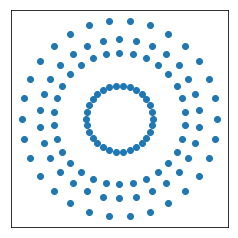

In [51]:
import matplotlib.pyplot as plt

x = [i[0] for i in H4_RS_proj]
y = [i[1] for i in H4_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

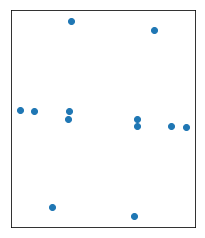

In [54]:
A2A2_RS=A2A2
A2A2_RS_proj=[]
for i in A2A2_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    A2A2_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])
x = [i[0] for i in A2A2_RS_proj]
y = [i[1] for i in A2A2_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

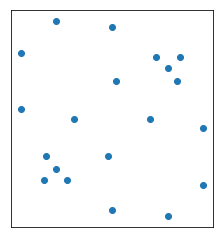

In [55]:
H2H2_RS=H2H2
H2H2_RS_proj=[]
for i in H2H2_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    H2H2_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])
x = [i[0] for i in H2H2_RS_proj]
y = [i[1] for i in H2H2_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

/Users/pierre-philippedechant/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


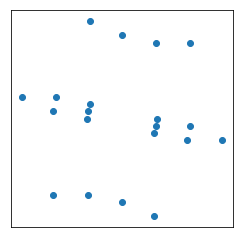

In [136]:
A4_RS=A4
A4_RS_proj=[]
for i in A4_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    A4_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])
x = [i[0] for i in A4_RS_proj]
y = [i[1] for i in A4_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

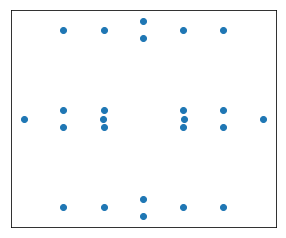

In [137]:
D4_RS=D4
D4_RS_proj=[]
for i in D4_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    D4_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])
x = [i[0] for i in D4_RS_proj]
y = [i[1] for i in D4_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

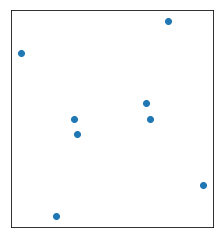

In [153]:
A14_RS=A14
A14_RS_proj=[]
for i in A14_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    A14_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])
x = [i[0] for i in A14_RS_proj]
y = [i[1] for i in A14_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

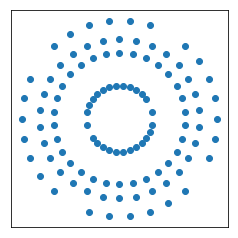

In [154]:
A14_RS=snubA14
A14_RS_proj=[]
for i in A14_RS:
    tmp_b = spIP(i, float_black_vector_H4)
    tmp_w = spIP(i, float_white_vector_H4)
    A14_RS_proj.append([tmp_b.blade_coefs()[0], tmp_w.blade_coefs()[0]])
x = [i[0] for i in A14_RS_proj]
y = [i[1] for i in A14_RS_proj]
plt.axes().set_aspect('equal')
plt.xlabel('')
plt.ylabel('')
plt.axes().set_xticks([])
plt.axes().set_yticks([])
plt.scatter(x,y)

Final checks root systems are closed and contained in $H_4$. 

In [88]:

for i in [a1*e3,   a2*e1*e2*e3,a2*e3,a1*e1*e2*e3]:
    print(i in spin_group_H3)



True
True
True
True


In [89]:
A2A2_spin_closure = closure_of_generators([a1*a1, a1*a2, e1*e2*e3*a1, e1*e2*e3*a2])


4 5
----------------
9 3
----------------
There are  12  elements in total.


In [90]:
H2H2_spin_closure = closure_of_generators([a1*a1, a2*a3, e1*e2*e3*a2, e1*e2*e3*a3])

4 6
----------------
10 8
----------------
18 2
----------------
There are  20  elements in total.


In [92]:
for i in A2A2_spin_closure:
    for j in A2A2_spin_closure:
        if i*j not in A2A2_spin_closure:
            print('problem')

In [93]:
for i in H2H2_spin_closure:
    for j in H2H2_spin_closure:
        if i*j not in H2H2_spin_closure:
            print('problem')